# Ejercicio 4
Divide aleatoriamente la base de datos de cáncer de seno de Wisconsin en un conjunto de entrenamiento con el 70 % de los datos y un conjunto de validación con el 30 % restante. Esta base de datos contiene 699 registros de tumores de seno, de los cuales 458 son benignos y 241 son malignos.

Cada registro consta de los siguientes atributos:

Número Atributo Valores
1 Código de la muestra ID <br>
2 Grosor del tumor 1–10 <br>
3 Uniformidad del tama˜no de la célula 1–10 <br>
4 Uniformidad de la forma de la célula 1–10 <br>
5 Adhesión marginal 1–10 <br>
6 Tamaño de célula epitelial 1–10 <br>
7 Núcleos desnudos 1–10 <br>
8 Cromatina blanda 1–10 <br>
9 Nucléolos normales 1–10 <br>
10 Mitosis de células 1–10 <br>
11 Clase 2 para benigno, 4 para maligno <br>

Entrena al menos 2 clasificadores de tumores de seno usando distintas distribuciones. Evalúa los clasificadores entrenados tanto con el conjunto de entrenamiento como con el conjunto de validación y discute su desempeño. Existen 16 registros en la base de datos con un atributo no especificado. 

Investiga estrategias para rellenar los datos faltantes, utiliza las que consideres más adecuadas para
este problema y discute el impacto en el desempeño del clasificador.



## Datos
Primero leeremos los datos, y los preprocesaremos para tenerlos "preparados" para las librerías que vamos a usar.
Cabe mencionar que la primer columna, al ser un identificador, lo eliminaremos.

Además, se ha especificado que existen 16 atributos sin un valor. Se encontró que el marcador que indica este fenómeno es "?", por lo que se procederá a reemplazar ese dato con la media de la característica donde se encuentre, utilizando la función SimpleImputer de ScikitLearn: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [63]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.impute import SimpleImputer


with open("breast-cancer-wisconsin.txt", "r") as entrada:
    datos_sucios = entrada.readlines()

datos = []
for dato in datos_sucios:
    dato = dato.replace("\n","")
    dato = dato.replace("?","0")
    datos.append(dato.split(","))

datos = np.array(datos)
print("Forma de los datos:")
print(datos.shape)

Forma de los datos:
(699, 11)


La forma de los datos correcta nos indica que todos los campos se encuentran llenos y que ya no faltan valores por poner. Sin embargo, aun no se introduce en los valores faltantes, el valor de la media. Eso se hace a continuación. También a continuación se cambia la etiqueta "2" por 0 y "4" por 1.

In [80]:
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
datos = imp_mean.fit_transform(datos)

x_train = []
y_train = []

for contador,dato in enumerate(datos):
    x_train.append((dato[1:-1]))
    y_train.append(int(dato[-1]))

Y = []
for dato in y_train:
    if dato == 2:
        dato = 0
        Y.append(dato)
    else:
        dato = 1
        Y.append(dato)

X = np.array(x_train)
Y = np.array(Y)

print(X)
print(Y)

[[ 5.  1.  1. ...  3.  1.  1.]
 [ 5.  4.  4. ...  3.  2.  1.]
 [ 3.  1.  1. ...  3.  1.  1.]
 ...
 [ 5. 10. 10. ...  8. 10.  2.]
 [ 4.  8.  6. ... 10.  6.  1.]
 [ 4.  8.  8. ... 10.  4.  1.]]
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0

Nuestros datos ahora están limpios de valores desconocidos.

## Entrenamiento
Partimos nuestro modelo en prueba y entrenamiento, y modelamos con los de entrenamiento.

Utilizaremos Naive Bayes con distribución normal, y otro con distribución de Bernoulli

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle = True)
clfG = GaussianNB()
clfG.fit(X_train,Y_train)

clfB = BernoulliNB()
clfB.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Resultados 
Obtenemos los scores para cada modelo.

In [82]:
print("Distribución Normal:")
print("Prueba: ", end =" ")
print(clfG.score(X_test,Y_test)*100,"%")
print("Entrenamiento: ", end =" ")
print(clfG.score(X_train,Y_train)*100,"%")

print("Distribución de Bernoulli:")
print("Prueba: ", end =" ")
print(clfB.score(X_test,Y_test)*100,"%")
print("Entrenamiento: ", end =" ")
print(clfB.score(X_train,Y_train)*100,"%")

Distribución Normal:
Prueba:  96.19047619047619 %
Entrenamiento:  96.31901840490798 %
Distribución de Bernoulli:
Prueba:  64.28571428571429 %
Entrenamiento:  66.05316973415133 %


Es notorio que la distribución normal ha funcionado mejor en este ejercicio. Veamos ahora las matrices de confusión.


### Distribución normal, datos de entrenamiento

              precision    recall  f1-score   support

   No Cancer       0.99      0.96      0.97       323
      Cancer       0.92      0.98      0.95       166

   micro avg       0.96      0.96      0.96       489
   macro avg       0.95      0.97      0.96       489
weighted avg       0.96      0.96      0.96       489



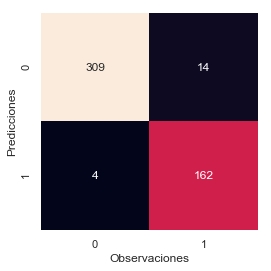

In [88]:
y_predG_train = clfG.predict(X_train)
y_predG_test = clfG.predict(X_test)
y_predB_train = clfB.predict(X_train)
y_predB_test = clfB.predict(X_test)

cmG_train = confusion_matrix(Y_train, y_predG_train)
cmG_test = confusion_matrix(Y_test, y_predG_test)
cmB_train = confusion_matrix(Y_train, y_predB_train)
cmB_test = confusion_matrix(Y_test, y_predB_test)

names = np.unique(y_predG_train)
sns.heatmap(cmG_train, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Observaciones')
plt.ylabel('Predicciones')

target_names = ['No Cancer','Cancer']
print (classification_report(Y_train, y_predG_train,target_names=target_names))

El número de observaciones con No Cancer, que fueron clasificadas como cancer, fueron 4. Menor que los Cancer que fueron clasificados como No Cancer.

### Distribución normal, datos de prueba


              precision    recall  f1-score   support

   No Cancer       0.99      0.95      0.97       135
      Cancer       0.91      0.99      0.95        75

   micro avg       0.96      0.96      0.96       210
   macro avg       0.95      0.97      0.96       210
weighted avg       0.96      0.96      0.96       210



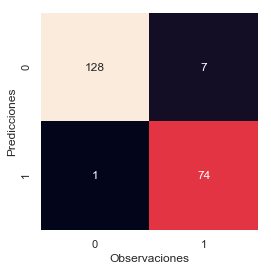

In [89]:
names = np.unique(y_predG_test)
sns.heatmap(cmG_test, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Observaciones')
plt.ylabel('Predicciones')

target_names = ['No Cancer','Cancer']
print (classification_report(Y_test, y_predG_test,target_names=target_names))

El caso es igual al anterior, pero con menos errores.

Observemos ahora cómo se comportan las características dependiendo de la etiqueta.

([array([110.,  29.,  64.,  45.,  61.,  11.,   0.,   3.,   0.,   0.]),
  array([270.,  27.,  18.,   6.,   0.,   1.,   0.,   1.,   0.,   0.]),
  array([245.,  38.,  26.,   9.,   2.,   2.,   0.,   1.,   0.,   0.]),
  array([263.,  27.,  25.,   3.,   1.,   3.,   0.,   0.,   0.,   1.]),
  array([ 32., 261.,  19.,   5.,   1.,   0.,   3.,   1.,   0.,   1.]),
  array([275.,  16.,  20.,   3.,   7.,   0.,   0.,   0.,   0.,   2.]),
  array([102., 116.,  91.,   6.,   4.,   1.,   3.,   0.,   0.,   0.]),
  array([287.,  20.,   7.,   0.,   1.,   3.,   2.,   2.,   1.,   0.]),
  array([313.,   7.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.])],
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 9 Lists of Patches objects>)

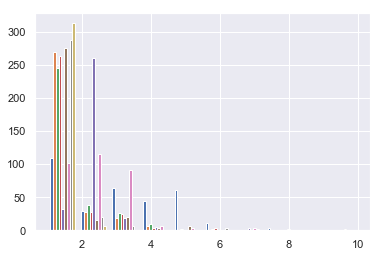

In [91]:
datos0=[]
datos1=[]

for dato, etiqueta in zip(X_train,Y_train):
    if etiqueta == 0:
        datos0.append(dato)
    else:
        datos1.append(dato)

datos0 = np.array(datos0)
datos1 = np.array(datos1)
plt.hist(datos0)

([array([ 3.,  3.,  8.,  8., 34., 11., 16., 28., 10., 45.]),
  array([ 4.,  4., 19., 23., 20., 16., 12., 21.,  3., 44.]),
  array([ 2.,  6., 14., 21., 20., 20., 22., 19.,  6., 36.]),
  array([22., 11., 23., 19., 14., 15.,  9., 15.,  2., 36.]),
  array([ 1., 18., 33., 27., 19., 23.,  7., 14.,  1., 23.]),
  array([ 9.,  6., 12.,  7., 17.,  2.,  6., 15.,  5., 87.]),
  array([ 1.,  6., 23., 22., 21.,  7., 48., 21.,  7., 10.]),
  array([28.,  4., 24., 11., 12., 15., 10., 12.,  8., 42.]),
  array([90., 22., 20.,  7.,  4.,  2.,  7.,  5.,  0.,  9.])],
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 9 Lists of Patches objects>)

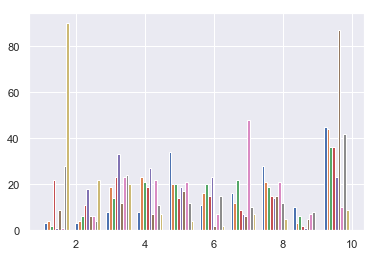

In [92]:
plt.hist(datos1)

Ambos comportamientos no se amoldan a distribuciones conocidas, pero la primera tiene un patrón mucho más diferenciable que la segunda. Es decir, se esperaría que se clasificaran mejor los No Cancer que los Cáncer, ya que los Cancer tienen una presencia uniforme de todas las características, mientras que los No Cancer carecen de las características más hacia la derecha de la gráfica.
